# Seleção do modelo de classificação
Com a variedade de modelos de classificação fornecidos pelo Scikit-learn, vamos testar uma variedade deles para avaliar qual o melhor.
## Importar ferramentas necessárias

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import roc_auc_score
from sklearn.metrics import RocCurveDisplay
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import ConfusionMatrixDisplay

In [2]:
# Carregar datasets
X_train = pd.read_csv("C:/Users/Protege Auto/Documents/X_train.csv")
y_train = np.ravel(pd.read_csv("C:/Users/Protege Auto/Documents/y_train.csv"))

## Otimização de hiperparâmetros

A seleção de modelos se dará na busca de hiperparâmetros ótimos nos diferentes modelos, usando a busca randomizada ou exaustiva.  
Devido ao número pequeno de amostras, a seleção fará uso de validação cruzada.

Os modelos testados são:
- Regressão Logística
- Florestas Randômicas
- K-Vizinhos Mais Próximos
- Vetor de Suporte
- Naive Bayes Gaussiano
- Naive Bayes Multinomial
- Gradient Boosting

Após, será selecionanda a melhor combinação obtida desses hiperparâmetros no melhor classificador.

In [3]:
grid = {
'solver': ['newton-cg', 'lbfgs', 'liblinear'],
'penalty': ['l2'],
'C': [100, 10, 1.0, 0.1, 0.01]
}

cv = StratifiedKFold(n_splits=3, shuffle = True, random_state=1)
model = LogisticRegression()

grid_search = RandomizedSearchCV(estimator=model, param_distributions=grid, n_jobs=-1, cv=cv, scoring= 'roc_auc', error_score=0)
grid_result = grid_search.fit(X_train, y_train)

# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("mean: %f with std: (%f) with params: %r" % (mean, stdev, param))

Best: 0.813219 using {'solver': 'liblinear', 'penalty': 'l2', 'C': 1.0}
mean: 0.789447 with std: (0.013898) with params: {'solver': 'liblinear', 'penalty': 'l2', 'C': 0.01}
mean: 0.780058 with std: (0.009943) with params: {'solver': 'lbfgs', 'penalty': 'l2', 'C': 100}
mean: 0.813219 with std: (0.012571) with params: {'solver': 'liblinear', 'penalty': 'l2', 'C': 1.0}
mean: 0.801961 with std: (0.010388) with params: {'solver': 'liblinear', 'penalty': 'l2', 'C': 10}
mean: 0.801965 with std: (0.010390) with params: {'solver': 'newton-cg', 'penalty': 'l2', 'C': 10}
mean: 0.799492 with std: (0.013246) with params: {'solver': 'newton-cg', 'penalty': 'l2', 'C': 0.1}
mean: 0.779827 with std: (0.009802) with params: {'solver': 'newton-cg', 'penalty': 'l2', 'C': 100}
mean: 0.789274 with std: (0.013946) with params: {'solver': 'lbfgs', 'penalty': 'l2', 'C': 0.01}
mean: 0.789274 with std: (0.013946) with params: {'solver': 'newton-cg', 'penalty': 'l2', 'C': 0.01}
mean: 0.801972 with std: (0.010390)

In [4]:
random_forest_grid = {
'n_estimators': [10, 100, 1000],
'max_features': ['sqrt', 'log2']
}

random_forest_model = RandomForestClassifier()
grid_search = GridSearchCV(estimator=random_forest_model, param_grid=random_forest_grid, n_jobs=-1, cv=cv,
                           scoring='roc_auc', error_score=0)
grid_result = grid_search.fit(X_train, y_train)

# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("mean: %f with std: (%f) with params: %r" % (mean, stdev, param))

Best: 0.826107 using {'max_features': 'log2', 'n_estimators': 1000}
mean: 0.734157 with std: (0.003505) with params: {'max_features': 'sqrt', 'n_estimators': 10}
mean: 0.806546 with std: (0.019687) with params: {'max_features': 'sqrt', 'n_estimators': 100}
mean: 0.819509 with std: (0.009602) with params: {'max_features': 'sqrt', 'n_estimators': 1000}
mean: 0.690415 with std: (0.007101) with params: {'max_features': 'log2', 'n_estimators': 10}
mean: 0.802342 with std: (0.010296) with params: {'max_features': 'log2', 'n_estimators': 100}
mean: 0.826107 with std: (0.011732) with params: {'max_features': 'log2', 'n_estimators': 1000}


In [5]:
knn_grid = {
'n_neighbors': range(11, 16, 2),
'weights': ['uniform', 'distance'],
'metric': ['euclidean', 'manhattan', 'minkowski']
}

knn_model = KNeighborsClassifier()
grid_search = RandomizedSearchCV(estimator=knn_model, param_distributions=knn_grid, n_jobs=-1, cv=cv,
                                 scoring='roc_auc', error_score=0)
grid_result = grid_search.fit(X_train, y_train)

# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("mean: %f with std: (%f) with params: %r" % (mean, stdev, param))

Best: 0.718465 using {'weights': 'distance', 'n_neighbors': 15, 'metric': 'euclidean'}
mean: 0.709908 with std: (0.006825) with params: {'weights': 'uniform', 'n_neighbors': 13, 'metric': 'minkowski'}
mean: 0.530952 with std: (0.003341) with params: {'weights': 'uniform', 'n_neighbors': 11, 'metric': 'manhattan'}
mean: 0.718465 with std: (0.004874) with params: {'weights': 'distance', 'n_neighbors': 15, 'metric': 'euclidean'}
mean: 0.709908 with std: (0.006825) with params: {'weights': 'uniform', 'n_neighbors': 13, 'metric': 'euclidean'}
mean: 0.712674 with std: (0.005125) with params: {'weights': 'distance', 'n_neighbors': 13, 'metric': 'minkowski'}
mean: 0.715581 with std: (0.005445) with params: {'weights': 'uniform', 'n_neighbors': 15, 'metric': 'minkowski'}
mean: 0.699501 with std: (0.004838) with params: {'weights': 'uniform', 'n_neighbors': 11, 'metric': 'minkowski'}
mean: 0.718465 with std: (0.004874) with params: {'weights': 'distance', 'n_neighbors': 15, 'metric': 'minkowski'

In [6]:
svc_grid = {
'kernel': ['poly', 'rbf', 'sigmoid'],
'C': [50, 10, 1.0, 0.1, 0.01],
'gamma': ['scale']
}

svc_model = SVC()
grid_search = RandomizedSearchCV(estimator=svc_model, param_distributions=svc_grid, n_jobs=-1, cv=cv,
                                 scoring='roc_auc', error_score=0)
grid_result = grid_search.fit(X_train, y_train)

# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("mean: %f with std: (%f) with params: %r" % (mean, stdev, param))

Best: 0.806044 using {'kernel': 'rbf', 'gamma': 'scale', 'C': 1.0}
mean: 0.789494 with std: (0.013978) with params: {'kernel': 'sigmoid', 'gamma': 'scale', 'C': 0.01}
mean: 0.723685 with std: (0.007549) with params: {'kernel': 'poly', 'gamma': 'scale', 'C': 10}
mean: 0.801711 with std: (0.011000) with params: {'kernel': 'sigmoid', 'gamma': 'scale', 'C': 1.0}
mean: 0.721518 with std: (0.006885) with params: {'kernel': 'poly', 'gamma': 'scale', 'C': 1.0}
mean: 0.715741 with std: (0.007523) with params: {'kernel': 'poly', 'gamma': 'scale', 'C': 0.01}
mean: 0.797193 with std: (0.013064) with params: {'kernel': 'sigmoid', 'gamma': 'scale', 'C': 0.1}
mean: 0.785993 with std: (0.013481) with params: {'kernel': 'rbf', 'gamma': 'scale', 'C': 0.01}
mean: 0.806044 with std: (0.011268) with params: {'kernel': 'rbf', 'gamma': 'scale', 'C': 1.0}
mean: 0.787027 with std: (0.012585) with params: {'kernel': 'rbf', 'gamma': 'scale', 'C': 0.1}
mean: 0.804742 with std: (0.011075) with params: {'kernel': '

In [7]:
gbn_grid = {
'var_smoothing': [1e-09,1e-08,1e-010] 
}

gbn_model = GaussianNB()
grid_search = RandomizedSearchCV(estimator=gbn_model, param_distributions=gbn_grid, n_jobs=-1, cv=cv,
                                 scoring='roc_auc', error_score=0)
grid_result = grid_search.fit(X_train, y_train)

# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("mean: %f with std: (%f) with params: %r" % (mean, stdev, param))

C:\Users\Protege Auto\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:305: UserWarning: The total space of parameters 3 is smaller than n_iter=10. Running 3 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Best: 0.657923 using {'var_smoothing': 1e-08}
mean: 0.657369 with std: (0.006804) with params: {'var_smoothing': 1e-09}
mean: 0.657923 with std: (0.006902) with params: {'var_smoothing': 1e-08}
mean: 0.655149 with std: (0.006754) with params: {'var_smoothing': 1e-10}


In [8]:
mnb_grid = {'alpha':[0.001, 0.01, 0.1, 1]}

mnb_model = MultinomialNB()
grid_search = GridSearchCV(estimator=mnb_model, param_grid=mnb_grid, n_jobs=-1, cv=cv, scoring='roc_auc', error_score=0)
grid_result = grid_search.fit(X_train, y_train)

# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("mean: %f with std: (%f) with params: %r" % (mean, stdev, param))

Best: 0.835278 using {'alpha': 1}
mean: 0.817467 with std: (0.007485) with params: {'alpha': 0.001}
mean: 0.826943 with std: (0.007792) with params: {'alpha': 0.01}
mean: 0.834803 with std: (0.008191) with params: {'alpha': 0.1}
mean: 0.835278 with std: (0.009875) with params: {'alpha': 1}


In [9]:
gradient_grid = {
    'loss': ['log_loss', 'deviance', 'exponential'],
    'learning_rate': [0.1, 0.01, 1, 10],
    'n_estimators': [10,100,1000],
    'subsample': [0.5,0.75,1],
    'min_samples_split': [1,3,5,7]
}

gradient_model = GradientBoostingClassifier()
grid_search = RandomizedSearchCV(estimator=gradient_model, param_distributions=gradient_grid, n_jobs=-1, 
                                 cv=cv, scoring='roc_auc', error_score=0)
grid_result = grid_search.fit(X_train, y_train)

# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("mean: %f with std: (%f) with params: %r" % (mean, stdev, param))

Best: 0.792192 using {'subsample': 0.5, 'n_estimators': 1000, 'min_samples_split': 3, 'loss': 'log_loss', 'learning_rate': 0.1}
mean: 0.527165 with std: (0.034473) with params: {'subsample': 0.5, 'n_estimators': 1000, 'min_samples_split': 7, 'loss': 'deviance', 'learning_rate': 10}
mean: 0.703396 with std: (0.007961) with params: {'subsample': 0.75, 'n_estimators': 1000, 'min_samples_split': 5, 'loss': 'deviance', 'learning_rate': 1}
mean: 0.664462 with std: (0.008408) with params: {'subsample': 0.5, 'n_estimators': 100, 'min_samples_split': 3, 'loss': 'log_loss', 'learning_rate': 1}
mean: 0.731382 with std: (0.009388) with params: {'subsample': 1, 'n_estimators': 10, 'min_samples_split': 5, 'loss': 'deviance', 'learning_rate': 1}
mean: 0.782285 with std: (0.010982) with params: {'subsample': 1, 'n_estimators': 100, 'min_samples_split': 7, 'loss': 'deviance', 'learning_rate': 0.1}
mean: 0.792192 with std: (0.008547) with params: {'subsample': 0.5, 'n_estimators': 1000, 'min_samples_spl

Foi utilizada a curva ROC como métrica de performance.

## Avaliação do modelo no conjunto de teste:

Sabendo a melhor combinação de hiperparâmetros nos cinco melhores modelos

In [10]:
X_test = pd.read_csv("C:/Users/Protege Auto/Documents/X_test.csv")
y_test = np.ravel(pd.read_csv("C:/Users/Protege Auto/Documents/y_test.csv"))

logreg_params = {'penalty': 'l2', 'C': 1.0, 'solver': 'liblinear'}
randfor_params = {'max_features': 'log2', 'n_estimators': 1000}
svc_params = {'kernel': 'rbf', 'gamma': 'scale', 'C': 1.0}
multinomialnb_params = {'alpha': 1}
gbc_params = {'subsample': 0.5, 'n_estimators': 1000, 'min_samples_split': 3, 'loss': 'log_loss', 'learning_rate': 0.1}

models = [
    ["log regression", LogisticRegression, logreg_params],
    ["random forest", RandomForestClassifier, randfor_params],
    ["support vector machines", SVC, svc_params],
    ["multinomial naive bayes", MultinomialNB, multinomialnb_params],
    ["gradient boosting classifier", GradientBoostingClassifier, gbc_params]
]

insights = []
for modelname, Model, params in models:
    model = Model(**params)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    score = roc_auc_score(y_test, y_pred)
    insights.append((modelname, model, params, score))

In [11]:
insights.sort(key=lambda x:x[-1], reverse=True)
for modelname, model, params, score in insights:
    print(modelname, params, score, end = "\n")

random forest {'max_features': 'log2', 'n_estimators': 1000} 0.7591166514254544
support vector machines {'kernel': 'rbf', 'gamma': 'scale', 'C': 1.0} 0.7500521409892351
multinomial naive bayes {'alpha': 1} 0.7373457829972245
log regression {'penalty': 'l2', 'C': 1.0, 'solver': 'liblinear'} 0.7338001957292519
gradient boosting classifier {'subsample': 0.5, 'n_estimators': 1000, 'min_samples_split': 3, 'loss': 'log_loss', 'learning_rate': 0.1} 0.7194493911536796


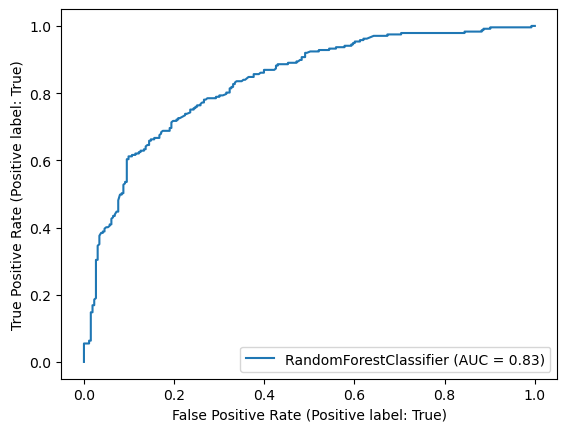

In [12]:
best_model = RandomForestClassifier(max_features= 'log2', n_estimators= 1000).fit(X_train, y_train)
RocCurveDisplay.from_estimator(best_model, X_test, y_test)
plt.show()

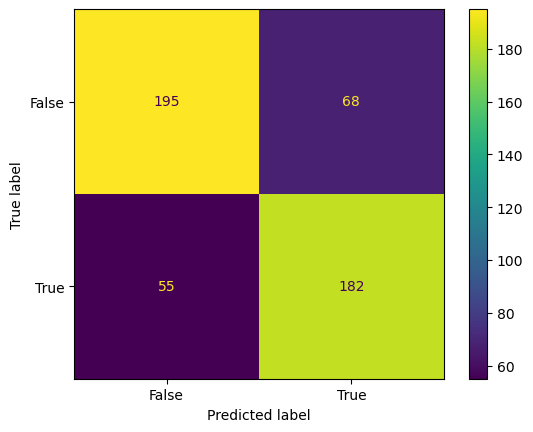

In [13]:
ConfusionMatrixDisplay.from_estimator(best_model, X_test, y_test)
plt.show()

In [14]:
y_pred = best_model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       False       0.78      0.74      0.76       263
        True       0.73      0.77      0.75       237

    accuracy                           0.75       500
   macro avg       0.75      0.75      0.75       500
weighted avg       0.76      0.75      0.75       500

